In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
wells = []
##global scope variable for the path to where all the well data is stored
_PATH = "data/"

In [50]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting, areas with higher
        self.northing = northing ##northing, areas with higher
        self.porosity = porosity ##porosity, definitely something there
        self.permeability = permeability ##permeability,definitely something there
        self.PR = PR ##poissons's ratio, might be something. couple of outliers but general convergence
        self.YM = YM ##young's modulus, pyramid shape, probably something
        self.wSaturation = wSaturation ##water saturation, no correlation to production
        self.oSaturation = oSaturation ##oil saturation, no correlation to production
        self.thickness = thickness ##thickness, no correlation to production
        self.proppant = proppant ##proppant weight, maybe a correlation
        self.pumpRate = pumpRate ##pumpRate, probably a correlation
        self.name = name ##name
        self.RF = RF ##recovery factor, maybe something
        self.Pa = Pa ##average pressure, probably something
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness * self.porosity * (1 - self.wSaturation)) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves(self):
        return (self.getOriginalOilPlace() * self.RF)
    
    ##Returns the production rate
    def InitialProduction(self):
        return (self.oilByMonth[0] * (math.exp((-1 * ((self.oilByMonth[11] - self.oilByMonth[0]) / 12) * time))))
        ##need to figure out how to plug in time (otherwise it will always equal first month production). also could be used
        ##to find the decline over time (where time is difference in production)
    
    def economicLimitROP(self):
        sumOilProduction = 0 
        for i in range(12):
            oil = getOilAtMonth(self, i)
            water = getWaterAtMonth(self, i)
            sumOilProduction += oil
            if(oil < water):
                return sumOilProduction
    
    ##Returns time in years
    def LifeOfReservoir(self):
        return ((1 / ((self.oilByMonth[11] - self.oilByMonth[0]) / 12)) * math.log((self.oilbyMonth[0]) / economicLimitROP(self)))
    
    ##Returns cumulative production in bbl
    def CumulativeProduction(self):
        return ((self.oilbyMonth[0] / declineRate) * math.log(self.oilbyMonth[0] / self.oilbyMonth[11]))
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getWaterAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)

In [3]:
##method to take the data given, create a well object and store it in wells
def createWells():
    wellProduction = pd.read_csv(_PATH + "well production.csv")
    for i in range(100):
    ##for every well
        ##get all the data from the well production csv
        name = wellProduction.at[i, "well name"]
        ap = wellProduction.at[i, "average pressure (Pa)"]
        RF = wellProduction.at[i, "recovery factor"]
        FVF = wellProduction.at[i, "formation volume factor"]
        oil = wellProduction.iloc[i, 4:16] ##oil per month
        water = wellProduction.iloc[i, 16:28] ##water per month
        ##now that we have the name of the well, we can use that to access its
        ##own csv file and get that data
        wellDF = pd.read_csv(_PATH + name + ".csv")
        e = wellDF["easting"]
        n = wellDF["northing"]
        p = wellDF["porosity"]
        perm = wellDF["permeability"]
        pr = wellDF["Poisson's ratio"]
        ym = wellDF["Young's Modulus"]
        ws = wellDF["water saturation"]
        os = wellDF["oil saturation"]
        thick = wellDF["thickness (ft)"]
        prop = wellDF["proppant weight (lbs)"]
        pump = wellDF["pump rate (cubic feet/min)"]
        ##create a new well
        temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
        ##append the new well to the list
        wells.append(temp)
        

In [4]:
createWells()

Text(0, 0.5, 'Total Production')

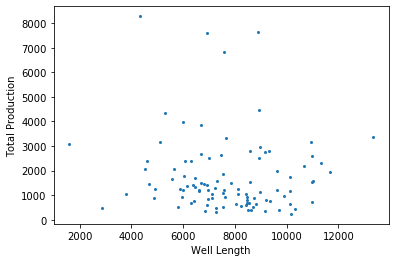

In [5]:
#Graph well length vs total production
xCoords = []
yCoords = []
depthVals = []
for well in wells:
    xCoords.append(well.getWellLength())
    yCoords.append(well.getTotalProduction())
    depthVals.append(well.thickness)
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Well Length")
plt.ylabel("Total Production")

In [6]:
#Graph amount of proppant to production

Text(0, 0.5, 'Total Production')

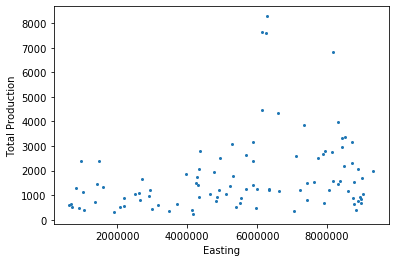

In [25]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.easting.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Easting")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

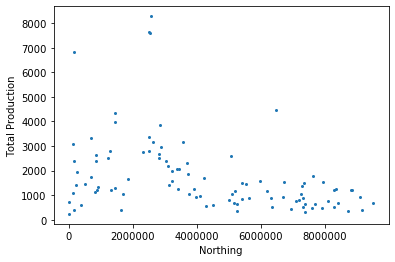

In [26]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.northing.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Northing")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

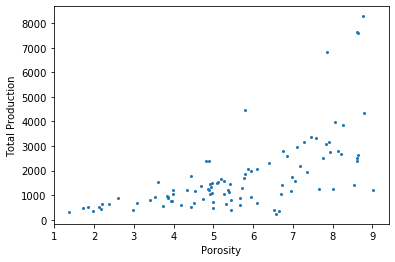

In [28]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.porosity.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Porosity")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

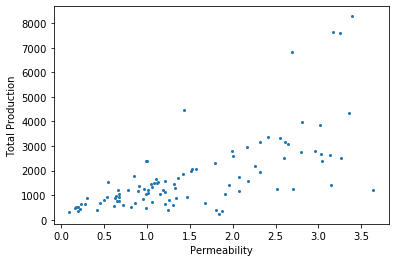

In [39]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.permeability.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Permeability")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

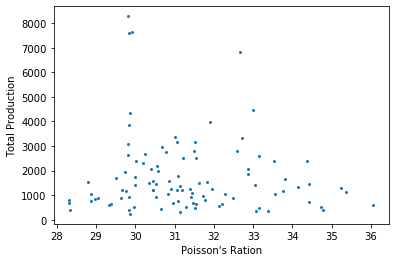

In [32]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.PR.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Poisson's Ration")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

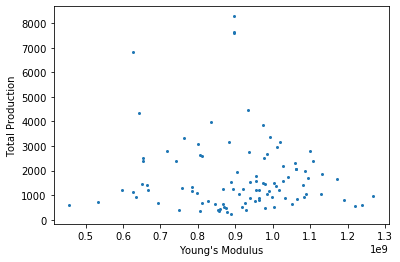

In [33]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.YM.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Young's Modulus")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

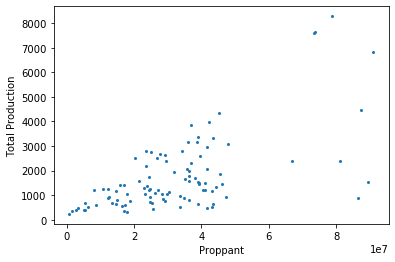

In [34]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.proppant.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Proppant")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

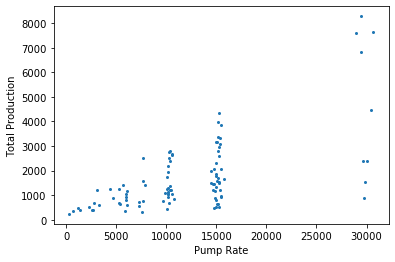

In [35]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.pumpRate.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Pump Rate")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

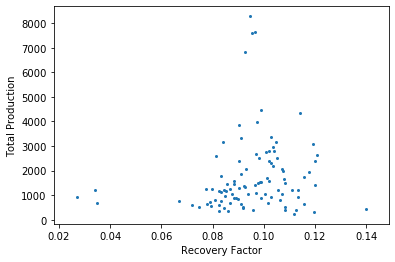

In [42]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.RF)
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Recovery Factor")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

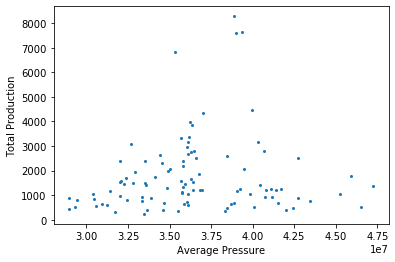

In [37]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.Pa.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Average Pressure")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

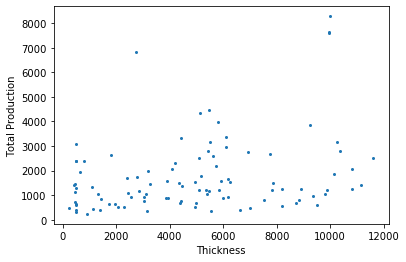

In [48]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.thickness.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Thickness")
plt.ylabel("Total Production")